
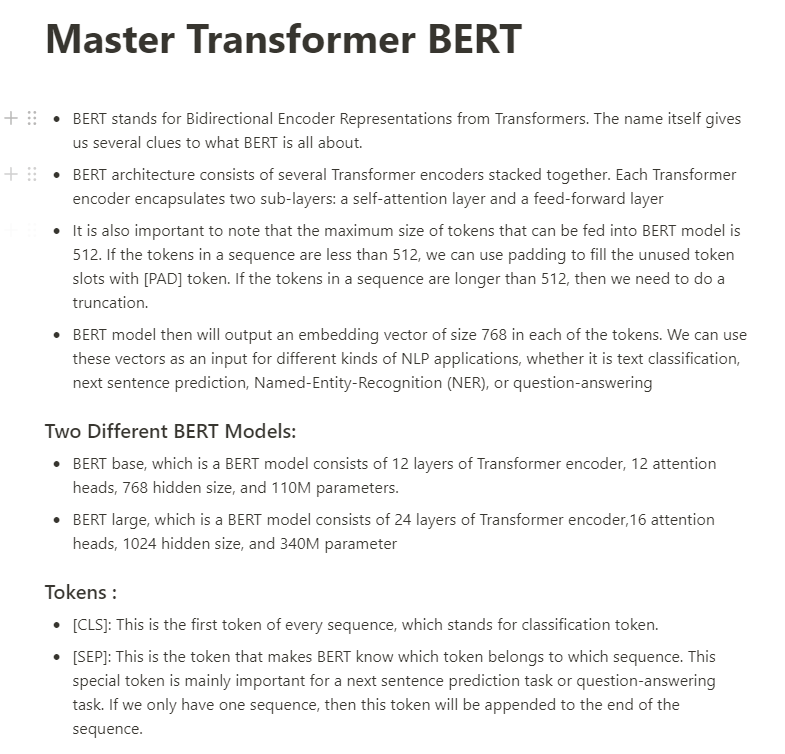
# **BERT - Bidirectonal Encoder Representation from Transformers**

In [3]:
!pip install transformers -q

In [4]:
from transformers import BertModel, BertTokenizer
import torch

In [5]:
model = BertModel.from_pretrained("bert-base-uncased")
print(model)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [102]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
sentence = "I love Deep learning"
tokens = tokenizer.tokenize(sentence)
tokens = ['[CLS]']+ tokens + ['[SEP]']
print(tokens)


['[CLS]', 'i', 'love', 'deep', 'learning', '[SEP]']


In [103]:
len(tokens)

6

In [104]:
i=0
input_size = 16
while i< (input_size - len(tokens)):
    tokens.append('[PAD]')


In [105]:
tokens

['[CLS]',
 'i',
 'love',
 'deep',
 'learning',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [106]:
attention_mask = [1 if i!='[PAD]' else 0 for i in tokens]
print(attention_mask)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## **Unique Token ID**

In [107]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(token_ids)

[101, 1045, 2293, 2784, 4083, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [108]:
token_ids = torch.tensor(token_ids).unsqueeze(0) # unsqueeze(0) is used to add a batch dimension
print(token_ids)

attention_mask = torch.tensor(attention_mask).unsqueeze(0) 
print(attention_mask)

tensor([[ 101, 1045, 2293, 2784, 4083,  102,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


## **Embedding**

In [109]:
output = model(token_ids, attention_mask=attention_mask)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 9.3486e-02,  3.0050e-02, -4.6828e-02,  ..., -1.0040e-01,
           1.0225e-03,  2.1679e-01],
         [ 7.6330e-01, -3.5065e-02,  4.6345e-02,  ..., -5.5347e-01,
           5.2810e-01,  1.8710e-01],
         [ 1.1967e+00,  7.6666e-01,  6.4562e-01,  ..., -2.1349e-01,
           2.3838e-01,  1.3432e-02],
         ...,
         [-6.6359e-02, -8.7203e-02,  3.1942e-01,  ...,  3.2502e-01,
          -2.6287e-01,  4.3206e-02],
         [-6.4521e-02, -3.8793e-03,  3.0239e-01,  ...,  2.6402e-01,
          -3.1958e-01,  5.6455e-02],
         [-2.7157e-01, -1.7632e-01,  2.5568e-01,  ...,  3.7952e-01,
          -2.6622e-01, -7.2593e-02]]], grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-7.8337e-01, -2.1058e-01,  5.2533e-01,  5.2831e-01, -2.7691e-01,
         -7.5921e-02,  7.6239e-01,  1.1257e-01,  2.9614e-01, -9.9931e-01,
          2.8164e-01,  1.3452e-01,  9.7537e-01, -2.6864e-01,  8.8432e-01,
         -3.0512e-